In [1]:
import sys
sys.path.append('../src')

from m4_generator import M4Generator
from error_functions import *
from visualization import *
from evaluation import evaluate_model
from m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [2]:
EPOCHS = 1
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48

gen = M4Generator("Dataset/Train/Hourly-train.csv", "Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON, BATCH_SIZE)

model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON)

hist = model.train(gen, epochs=EPOCHS)

model.save(f'models/{model_name}.json', f'models/{model_name}.h5')

Epoch 1/1
137/137 [==============================] - 28s 203ms/step - loss: 0.1606
Saved model to disk


In [5]:
#=================== Evaluate Model
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON, BATCH_SIZE)

model = M4Model(batch_size=BATCH_SIZE)
model.load('../models/LSTM_E10_B50_H100_L48.json','../models/LSTM_E10_B50_H100_L48.h5')

train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(model, train_x, train_y, smapetf)
print(train_error)

test_error = evaluate_model(model, test_x, test_y, smapetf)
print(test_error)


Loaded model from disk
20.19735350159417
31.11763461143783


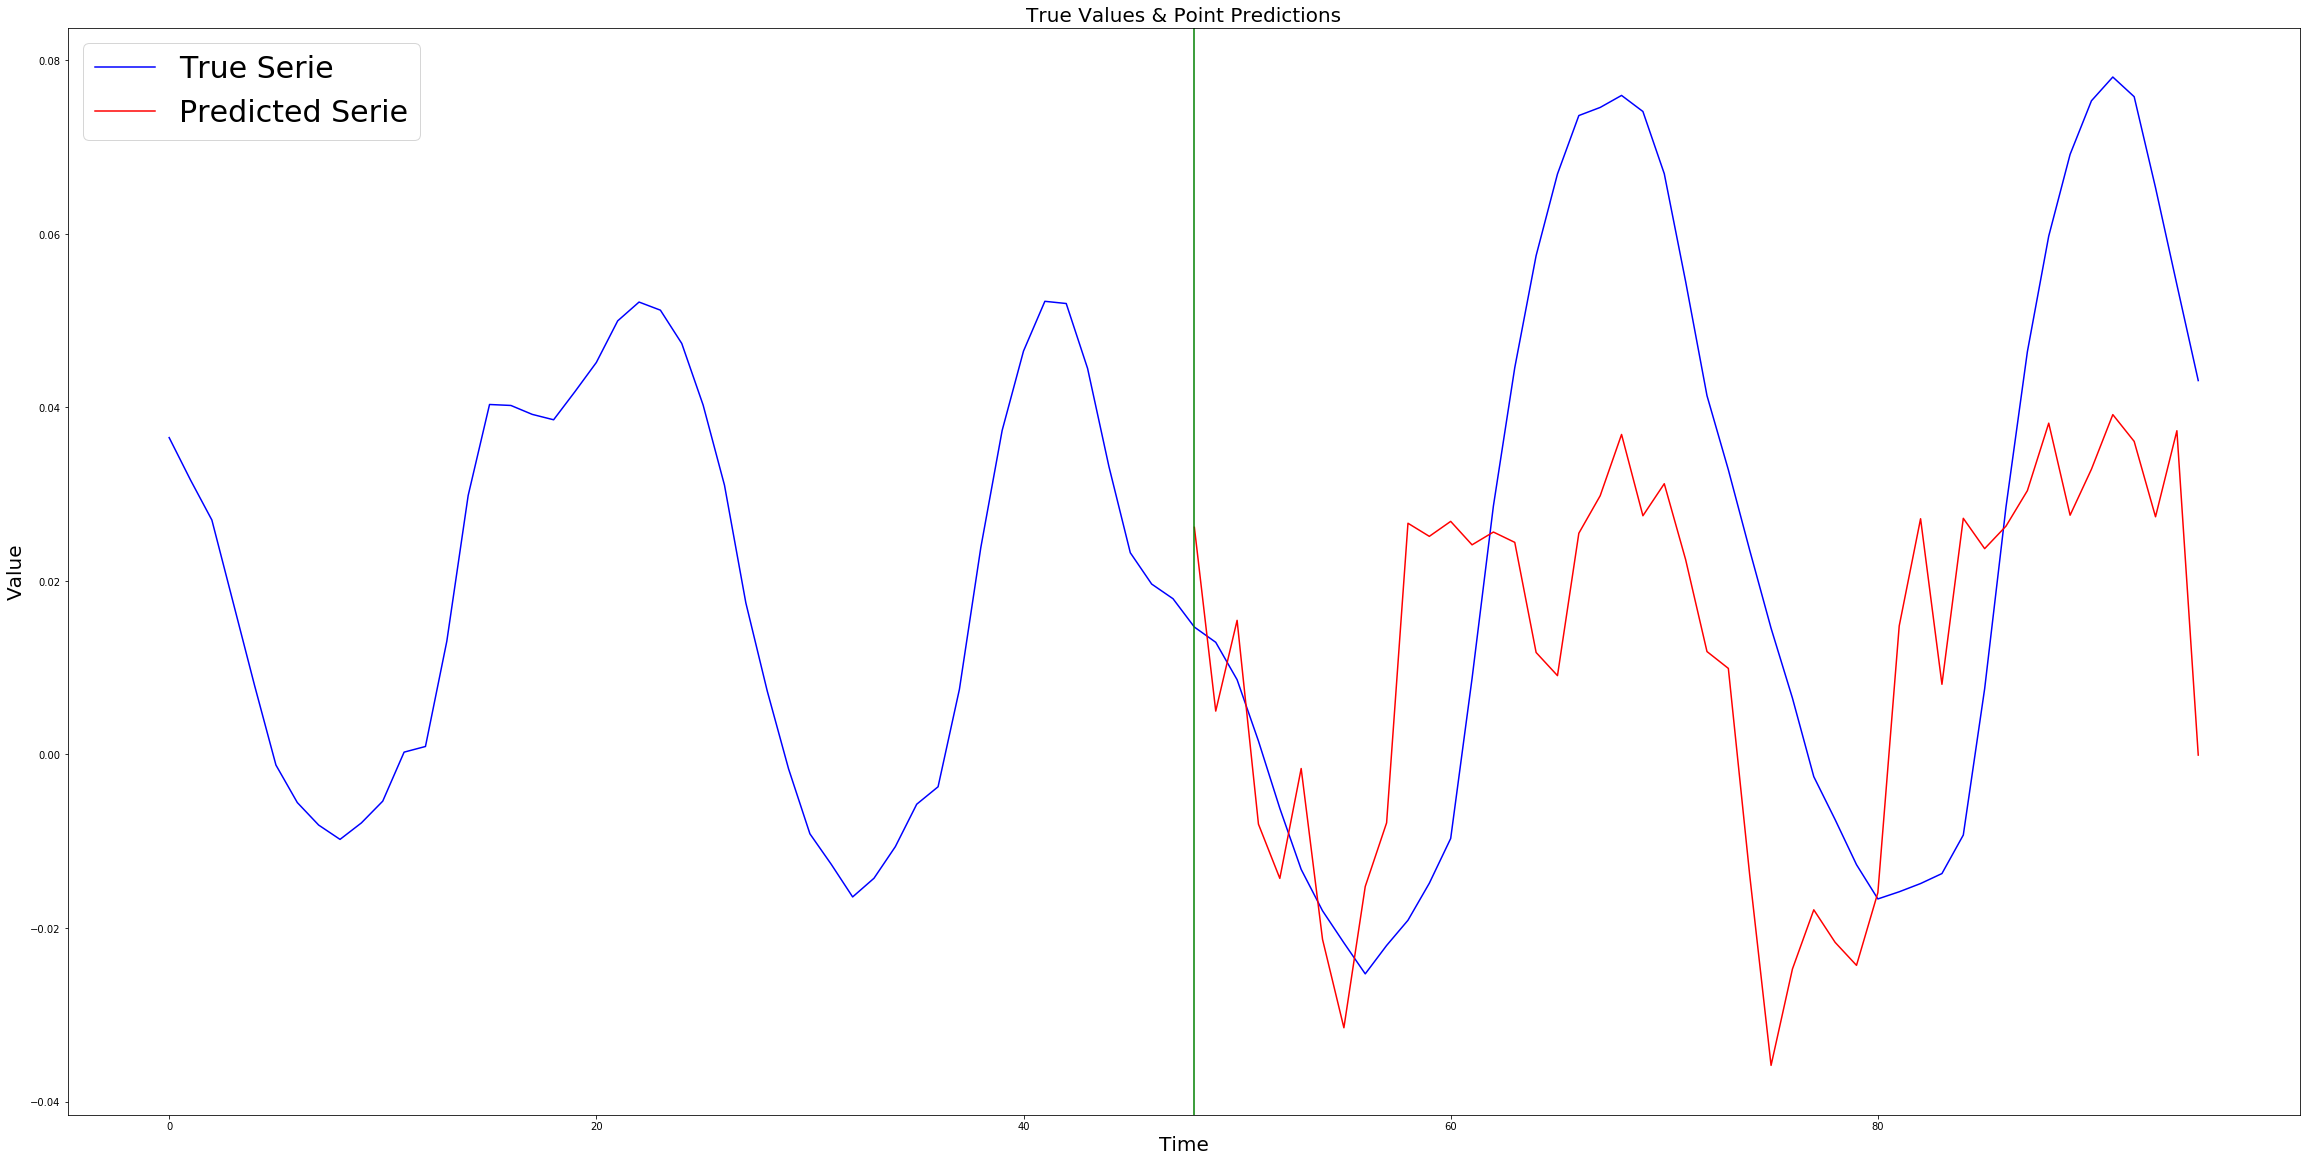

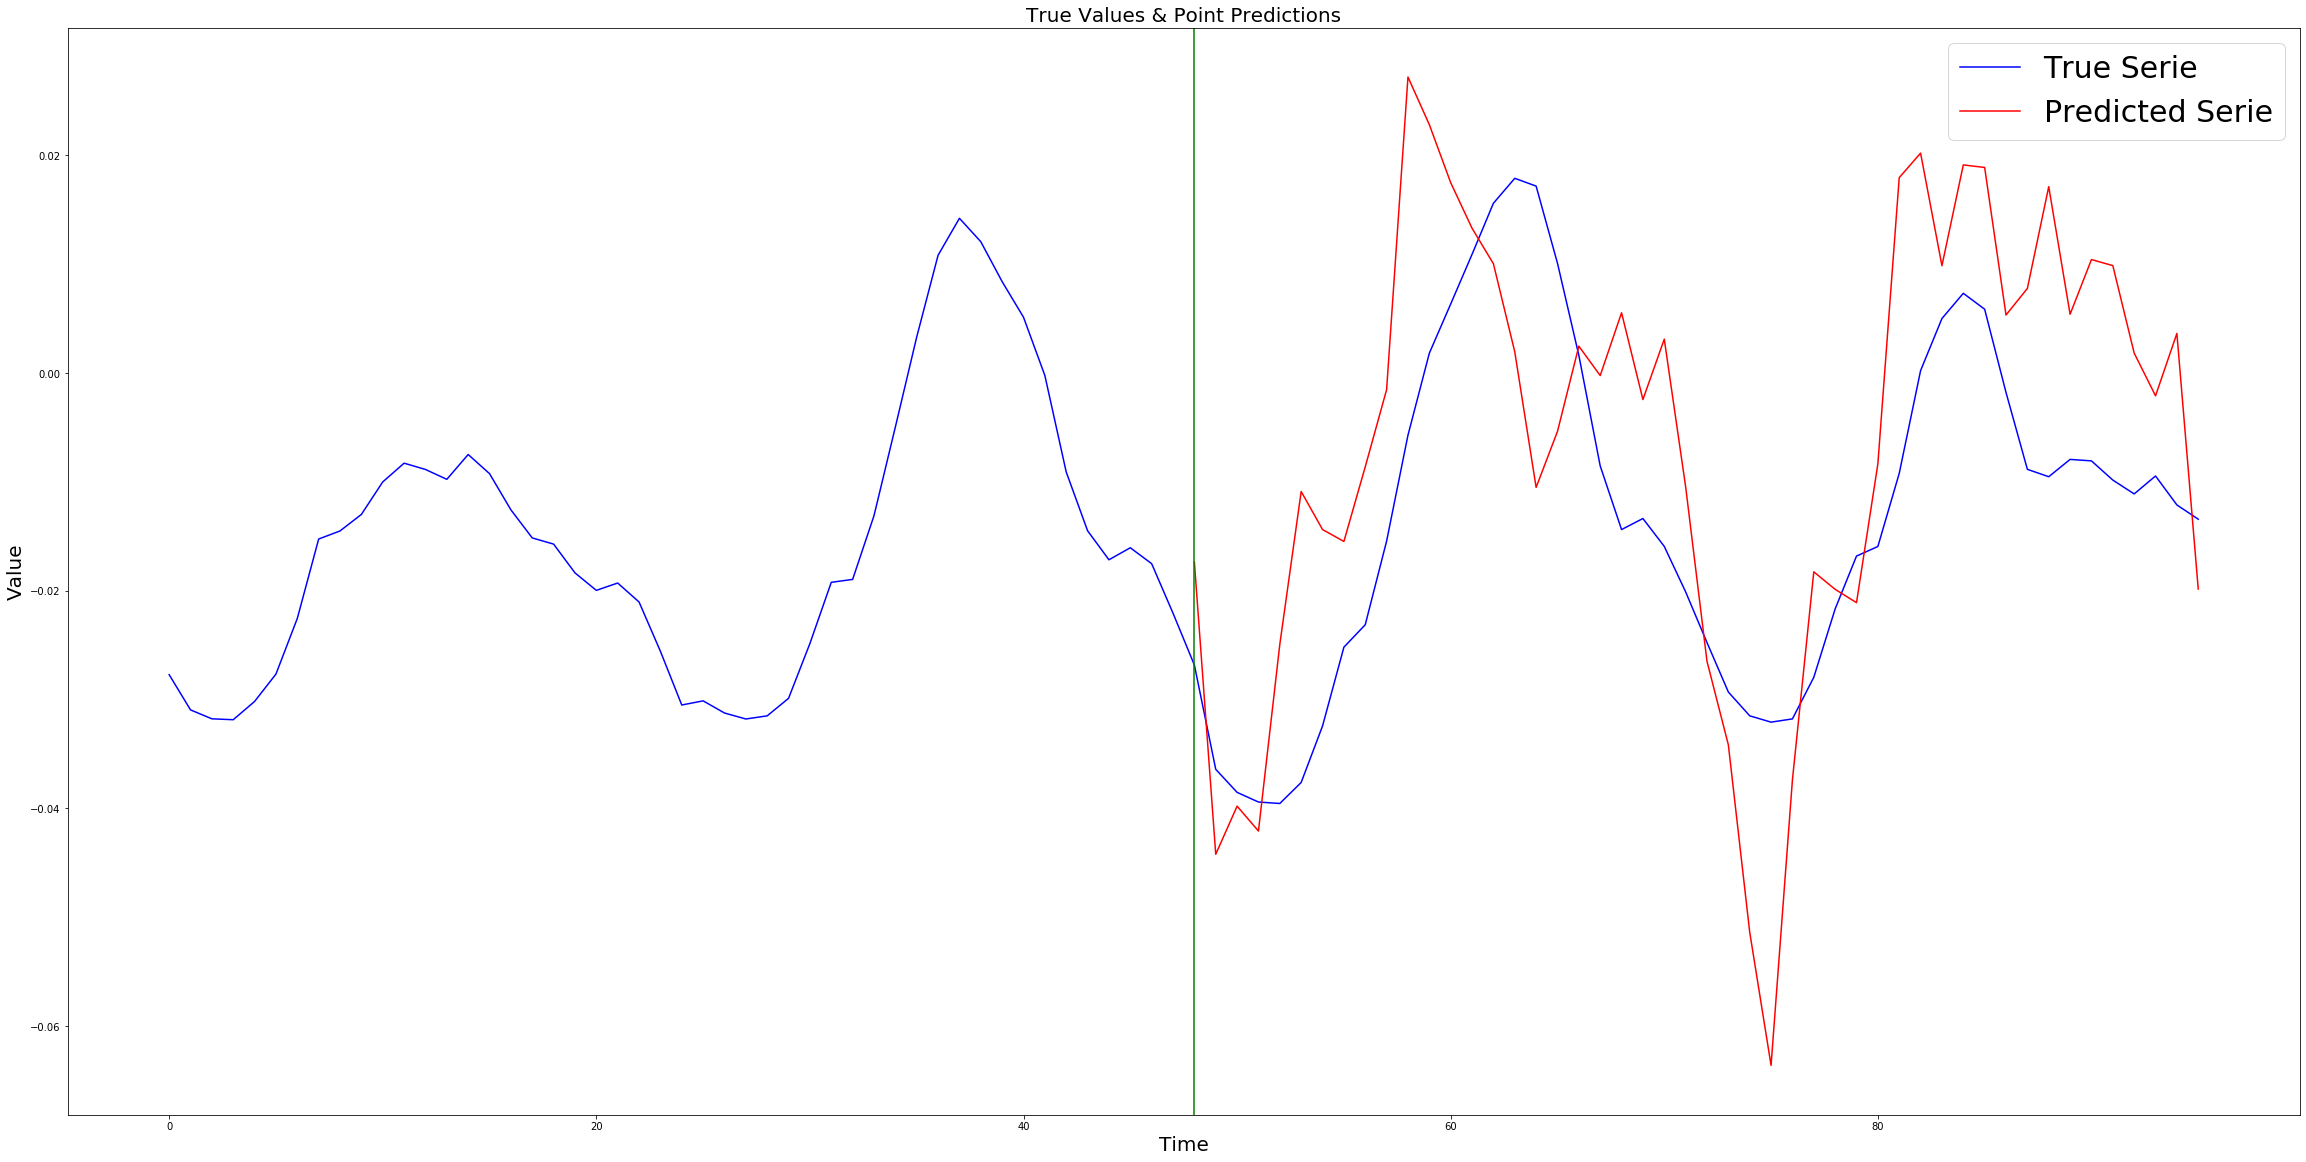

In [6]:
train_x, train_y, test_x, test_y = gen.get_data()



#============ Predict Train
predictedY = model.predict(train_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(train_x, train_y, predictedY)
plot_serie_and_prediction(train_x, train_y, predictedY, serie_indx=19)

#============ Predict Test
predictedY = model.predict(test_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(test_x, test_y, predictedY, serie_indx=19)

In [ ]:
#=================== Evaluate Model
train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(model, train_x, train_y, smapetf)
test_error = evaluate_model(model, test_x, test_y, smapetf)

with open(f'models/{model_name}.txt', 'a') as file:
    file.write(f'Training Error: {train_error}\n')
    file.write(f'Test Error: {test_error}')